# Wide beam longitudinal offset

Paper: [_Optimal laser focusing for positron production in laser-electron scattering_, Óscar Amaro and Marija Vranic 2021 New J. Phys. __23__ 115001](https://iopscience.iop.org/article/10.1088/1367-2630/ac2e83)

Preprint: https://arxiv.org/abs/2106.01877

In this notebook we show the consistency between the analytical expression for the a0eff distribution and particle sampling in a wide beam geometry with longitudinal offset.

In [1]:
import os
import sys
sys.path.append('../QScatter')
import QScatter
from QScatter import *

In [6]:
## parameters
# laser
a0 = 1; #[]
lbd = 0.8; #[\mu m]
W0 = 3.0; #[\mu m]
zR = pi*W0**2/lbd; #[\mu m]
# beam
nb = 1; #[cm^-3]
sigmax = 24.4; #[\mu m]
sigmay = 29.6; #[\mu m]
R = (sigmax+sigmay)/2*sqrt(2); #[\mu m]
L = 300; #[\mu m]
Nb = nb*pi*R**2*L; #[]
DeltaL = L/3 #[\mu m]

In [7]:
Nsmpl = int(1e6);
# 
zmax = L/4 ; #[\mu m]
zmin = zmax-L/2; #[\mu m]
# coordinate data (constant density)
zdist = (zmax-zmin)*rng.random(Nsmpl) + zmin; #[\mu m]
xdist = sigmax*rng.standard_normal(Nsmpl) #[\mu m]
ydist = sigmay*rng.standard_normal(Nsmpl) #[\mu m]
# calculate a
adim = 50; #[]
nbins = 20; #[]
alst = np.linspace(0.01*a0,0.999*a0,adim); #[]
abins = np.linspace(0.01*a0,0.999*a0,nbins); #[]
da = abins[1]-abins[0]; #[]

# Dpll!=0
# get histograms
adist_0L = gauss3D(zdist,xdist,ydist,a0,W0,lbd);
adist_y_0L, adist_x_0L = np.histogram(adist_0L,abins)
# normalize to Nb
adist_y_0L, adist_x_0L = adist_y_0L*Nb/Nsmpl, arraycenter(adist_x_0L)
# analytical distribution
dNda_th_0L = nb*dNda_Wide_3D(alst,a0,L,W0,lbd,0);
# infinite beam
dNdainf_th = nb*dNda_Wide_3D(alst,a0,1e3*L,W0,lbd,DeltaL);

# Dpll!=0
# get histograms
adist_L = gauss3D(zdist+DeltaL,xdist,ydist,a0,W0,lbd);
adist_y_L, adist_x_L = np.histogram(adist_L,abins)
# normalize to Nb
adist_y_L, adist_x_L = adist_y_L*Nb/Nsmpl, arraycenter(adist_x_L)
# analytical distribution
dNda_th_L =nb*dNda_Wide_3D(alst,a0,L,W0,lbd,DeltaL);

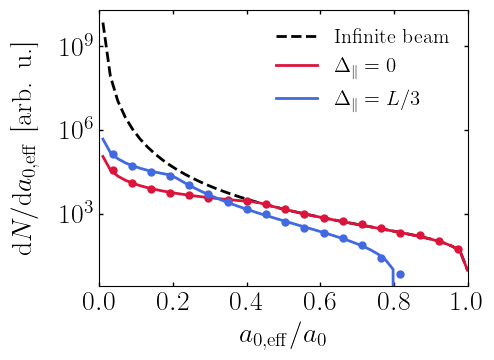

In [8]:
plt.style.use("../reduQED/style.txt")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

plt.plot(alst/a0, dNdainf_th*da, 'k--', label=r'Infinite beam');
plt.plot(alst/a0, dNda_th_0L*da, '-', color='crimson', label=r'$\Delta_\parallel=0$');
plt.plot(adist_x_0L/a0, adist_y_0L, '.', color='crimson');
plt.plot(alst/a0, dNda_th_L*da, '-', color='royalblue', label=r'$\Delta_\parallel=L/3$');
plt.plot(adist_x_L/a0, adist_y_L, '.', color='royalblue');

plt.yscale('log')
plt.xlabel(r'$a_{0,\mathrm{eff}}/a_0$')
plt.ylabel(r'$\mathrm{d}N/\mathrm{d}a_{0,\mathrm{eff}}$ [arb. u.]',labelpad=15)
plt.legend(frameon=False,)
plt.tick_params(which='both',axis="y",direction="in", labelleft=True, labelright=False, left=True, right=True)
plt.tick_params(which='both',axis="x",direction="in", labeltop=False, labelbottom=True, top=True, bottom=True)
#plt.xlim([0,7.3])
#plt.ylim(1e5,1e9)
plt.xticks([0,0.2,0.4,0.6,0.8,1])
#plt.yticks([1e5,1e6,1e7,1e8,1e9])
# aspect
axes.set_box_aspect(aspect=3/4)
# final
plt.tight_layout()
#plt.savefig('Wide_3D_DeltaL.pdf')
plt.show()